# 1. Introduction

![tap water](unsplash_tap.jpg)

<span>Photo by <a href='https://unsplash.com/photos/SVeCm5KF_ho'>Luis Totsa</a> on <a
href='https://unsplash.com/photos/SVeCm5KF_ho' >Unsplash</a></span>

In this Project, I will complete a machine learning workflow using classification solutions, including data preparation, modeling (including hyperparameter tuning), and final model evaluation.

## 1.1. Business Understanding

### 1.1.1. Problem

Water shortage in Tanzania has been a problem for years now. The most affected are the rural areas. One out of six people lack access to safe drinking water in Tanzania (WHO/UNICEF, 2004). 

According to UNICEF, It is estimated that Tanzania spends 70 per cent of its health budget on preventable Water, Sanitation and Hygiene (WASH) related diseases as the majority of the population does not have access to improved sanitation, and close to half of the population does not have access to clean drinking water.

As part of its Vision 2025, the Government of Tanzania has pledged to increase access to improved sanitation to 95 per cent by 2025. The Second Five Year Development Plan (FYDP II) has also set the target for access to improved sanitation facilities at 85 per cent in rural areas.

UNICEF is working with the Tanzanian Government and development partners on four priority WASH areas:
 1. To ensure access to improved sanitation and hygiene in rural and peri-urban communities.
 2. Develop sustainable solutions for provision of WASH facilities in health and educational institutions.
 3. Ensure sustainable and equitable access to safe drinking water in rural and periurban areas.
 4. Provide effective response in emergencies to prevent the spread of diseases due to poor sanitation, unhygienic living conditions and unsafe drinking water.

### 1.1.2. Aim
There are many water wells already established across different parts of the country. 

To achieve the third priority WASH areas goal, there is need to know the conditions of the waterpumps in these water wells which would advice the best strategy moving forward.. Visiting each well to establish their conditions would be highly costly and time consuming. 

The Tanzanian Government in partnership with UNICEF has contracted my consulting company, Nangila Analytics, to create a machine learning (ML) model to predict conditions of waterpumps ranking them in three levels:
- Functional
- Non Functional
- Functional needs repair

This ML model will be used to choose the best strategy moving forward.

## 2.2. Objectives

- To build a ML model that predicts the conditions of water pumps with an acceptably high accuracy.
- To compare different ML models predictions to achieve highest accuracy
- Advice the client on best strategy

# 1.2. Data Understanding

The data that I will use for this project comes from the Taarifa waterpoints dashboard, which has been aggregated from the Tanzania Ministry of Water.

Taarifa is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues. It acts a a bug tracker for real world which helps to engage citizens with their local government. It has been working on an Innovation Project in Tanzania, with various partners.

There are three datasets for this project:
 1. Training set labels (59400 waterpoints × 2 features)
 2. Training set values (59400 waterpoints × 40 features)
 3. Test set values (14850 waterpoints × 40 features)

For this project I will use datasets 1 & 2. 

The target variable will be status_group which details the functionality of a waterpoint

Features include:

- amount_tsh           - Total static head (amount water available to waterpoint)
- date_recorded         - The date the row was entered
- funder                - Who funded the well
- gps_height            - Altitude of the well
- installer             - Organization that installed the well
- longitude             - GPS coordinate
- latitude              - GPS coordinate
- wpt_name              - Name of the waterpoint if there is one
- num_private           - No description
- basin                 - Geographic water basin
- subvillage            - Geographic location
- region                - Geographic location
- region_code           - Geographic location (coded)
- district_code         - Geographic location (coded)
- lga                   - Geographic location
- ward                  - Geographic location
- population            - Population around the well
- public_meeting        - True/False
- recorded_by           - Group entering this row of data
- scheme_management     - Who operates the waterpoint
- scheme_name           - Who operates the waterpoint
- permit                - If the waterpoint is permitted
- construction_year     - Year the waterpoint was constructed
- extraction_type       - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management            - How the waterpoint is managed
- management_group      - How the waterpoint is managed
- payment               - What the water costs
- payment_type          - What the water costs
- water_quality         - The quality of the water
- quality_group         - The quality of the water
- quantity              - The quantity of water
- quantity_group        - The quantity of water
- source                - The source of the water
- source_type           - The source of the water
- source_class          - The source of the water
- waterpoint_type       - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint





## 1.3. Requirements

1. Data Preparation
       - Loading Libraries
       - Loading data
       - Descriptive Exploration
       - Data Cleaning
       - Exploratory Descriptive Analysis (EDA)
       - Pre-processing Data
2.  Modelling
        - Train test split
        - Baseline Model
        - Random Forest
        - Decision Tree
        - Logistic Regression
        - Evaluation
4.  Conclusion
5.  Recommendation

## 2. Data Preparation

## 2.1. Loading Libraries
- Loading all relevant libraries for this notebook

In [85]:
#load relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter("ignore")
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report
from sklearn.metrics import log_loss, accuracy_score, roc_curve, auc, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, GridSearchCV

## 2.2. Loading Datasets
- Loading datasets

In [86]:
# Loading datasets
train_values = pd.read_csv('training_set.csv')
train_labels = pd.read_csv('training_labels.csv')

## 2.3 Explore dataframes
- Descriptive exploration of data

In [87]:
# Check head of dataframe
train_values.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,...,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,...,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,...,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,...,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [88]:
# Check head of dataframe
train_labels.head(3)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional


#### Observation

- I will need to merge train values and train labels.

- The id column seems to be a unique identifier so I will make it and index column.

In [89]:
# Merge train values and train labels dataframes
train = train_values.merge(train_labels, how='inner')
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,...,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,...,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,...,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,...,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,...,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,...,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [90]:
# expanding the number of visible columns
pd.set_option('display.max_columns', 30)

In [91]:
#  Set id as index column
train.set_index('id', inplace = True)
train.head(10)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,...,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,...,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,...,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,...,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,...,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,...,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,...,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,...,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,...,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,...,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


#### Observation
- There seems to be duplicated columns in the dataframe.

- They have same infomation.

- I will expore that further later

In [92]:
#Check dataframe shapes
print('Train:', train.shape)

Train: (59400, 40)


In [93]:
# Chech train dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [94]:
# Check train dataframe description
train.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


## 2.4. Data Cleaning

The data cleaning methods to be employed are :

- Consistency
- Validity
- Completeness
- Collinearity


## 2.4.1. Consistency
- Checking to see there are any duplicates both in rows and in columns.

In [95]:
# Checking for duplicates in rows
train.duplicated().sum()

36

In [96]:
#drop all duplicates in rows
train.drop_duplicates(inplace=True)

In [97]:
# Confirming all duplicates are dropped
train.duplicated().any()

False

As mentioned earlier there are columns that seem to have repeated information.
I will explore these columns to assertain if they are indeed duplicated then drop some of them.

In [98]:
# Get unique values for columns
train.apply(lambda x: len(x.unique()))

amount_tsh                  98
date_recorded              356
funder                    1898
gps_height                2428
installer                 2146
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19288
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               3
recorded_by                  1
scheme_management           13
scheme_name               2697
permit                       3
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

#### Waterpoint

In [99]:
# Check value counts
train['waterpoint_type'].value_counts()

communal standpipe             28516
hand pump                      17466
other                           6377
communal standpipe multiple     6099
improved spring                  783
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [100]:
# Check value counts
train['waterpoint_type_group'].value_counts()

communal standpipe    34615
hand pump             17466
other                  6377
improved spring         783
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [101]:
# Both columns have the same data
# Communal standpipe and standpipe multiple are merged in waterpoint type group
# I will drop one of the columns. 
train = train.drop(['waterpoint_type'],axis=1)

#### Source

In [102]:
# Check value counts
train['source'].value_counts()

spring                  17020
shallow well            16801
machine dbh             11069
river                    9612
rainwater harvesting     2293
hand dtw                  874
lake                      763
dam                       655
other                     211
unknown                    66
Name: source, dtype: int64

In [103]:
# Check value counts
train['source_type'].value_counts()

spring                  17020
shallow well            16801
borehole                11943
river/lake              10375
rainwater harvesting     2293
dam                       655
other                     277
Name: source_type, dtype: int64

In [104]:
# Check value counts
train['source_class'].value_counts()

groundwater    45764
surface        13323
unknown          277
Name: source_class, dtype: int64

In [105]:
# Source and source type have similar data 
# Some values are merged in the source type column
# I will drop one of the columns
train = train.drop(['source'],axis=1)

#### Quantity

In [106]:
# Check value counts
train['quantity'].value_counts()

enough          33165
insufficient    15119
dry              6243
seasonal         4048
unknown           789
Name: quantity, dtype: int64

In [107]:
# Check value counts
train['quantity_group'].value_counts()

enough          33165
insufficient    15119
dry              6243
seasonal         4048
unknown           789
Name: quantity_group, dtype: int64

In [108]:
# Both columns have the same data
# I will drop one of the columns. 
train = train.drop(['quantity_group'],axis=1)

#### Quality

In [109]:
# Check value counts
train['water_quality'].value_counts()

soft                  50785
salty                  4856
unknown                1873
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [110]:
# Check value counts
train['quality_group'].value_counts()

good        50785
salty        5195
unknown      1873
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [111]:
# Source and source type have similar data 
# Some values are merged in the quality group column
# I will drop one of the columns
train = train.drop(['quality_group'],axis=1)

#### Payment

In [112]:
# Check value counts
train['payment'].value_counts()

never pay                25337
pay per bucket            8984
pay monthly               8300
unknown                   8134
pay when scheme fails     3914
pay annually              3642
other                     1053
Name: payment, dtype: int64

In [113]:
# Check value counts
train['payment_type'].value_counts()

never pay     25337
per bucket     8984
monthly        8300
unknown        8134
on failure     3914
annually       3642
other          1053
Name: payment_type, dtype: int64

In [114]:
# Both columns have the same data
# I will drop one of the columns. 
train = train.drop(['payment'],axis=1)

#### Management

In [115]:
# Check value counts
train['management'].value_counts()

vwc                 40493
wug                  6495
water board          2933
wua                  2535
private operator     1971
parastatal           1766
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [116]:
# Check value counts
train['management_group'].value_counts()

user-group    52456
commercial     3638
parastatal     1766
other           943
unknown         561
Name: management_group, dtype: int64

In [117]:
# Source and source type have similar data 
# Some values are merged in the management group column
# I will drop one of the columns
train = train.drop(['management'],axis=1)

#### Extraction

In [118]:
# Check value counts
train['extraction_type'].value_counts()

gravity                      26776
nira/tanira                   8143
other                         6427
submersible                   4759
swn 80                        3663
mono                          2865
india mark ii                 2398
afridev                       1769
ksb                           1413
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  97
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [119]:
# Check value counts
train['extraction_type_group'].value_counts()

gravity            26776
nira/tanira         8143
other               6427
submersible         6172
swn 80              3663
mono                2865
india mark ii       2398
afridev             1769
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        97
Name: extraction_type_group, dtype: int64

In [120]:
# Check value counts
train['extraction_type_class'].value_counts()

gravity         26776
handpump        16434
other            6427
submersible      6172
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [121]:
# Source and source type have similar data 
# Some values are merged in the extraction type class column
# I will drop two of the columns
train = train.drop(['extraction_type', 'extraction_type_group'],axis=1)

#### Geography

In [122]:
# There are too many columns representing geographical data
# e.g. gps_height, longitude, latitude, region_code and district_code
# These are less likely to add any predictive power to the model
# I will drop some of these columns
train = train.drop(['gps_height', 'region_code', 'district_code', 'ward'], axis=1)

## 2.4.2. Validity
- Check to see if all the columns in the dataset are valid/useful for this analysis
- Dropping any that isn't useful.

#### num_private and wpt_name

- 'num_private' hasn't been given a description on Driven Data, it appears to be superflous.
- 'wpt_name' gives only waterpoint name. It does not seem relevant in prediction
-  I will drop these columns

In [123]:
# Drop columns
train = train.drop(['num_private', 'wpt_name'], axis=1)

#### recorded_by
- The values in this column are same. 
- There is no point to go forward with this column.

In [124]:
# Check value counts
train['recorded_by'].value_counts()

GeoData Consultants Ltd    59364
Name: recorded_by, dtype: int64

In [125]:
# Drop column
train = train.drop(['recorded_by'],axis=1)

#### Construction Year

- I will turn construction_year into a categorical column containing the following values: '60s', '70s','80s', '90s, '00s', '10s', 'unknown'.

In [126]:
# Define a grouping function
def construction_grouping(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train['construction_year'] = train.apply(lambda row: construction_grouping(row), axis=1)

#### Date recorded
- I will convert 'date_recorded' into records of days since it was recorded

In [127]:
# Get days from since recorded
train.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train.date_recorded)
train.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train.columns]
train.days_since_recorded = train.days_since_recorded.astype('timedelta64[D]').astype(int)

## 2.4.3. Completeness
- Check to see if there are any missing/null values, and impute them.

In [128]:
# Define a function to get missing data
def missing_data(df):
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data

In [129]:
# print missing columns on training test
missing_data(train)

funder                3635
installer             3655
subvillage             371
public_meeting        3314
scheme_management     3877
scheme_name          28139
permit                3056
dtype: int64

To get a better understanding of how to deal with the missing values, I will explore the columns further. 

#### funder column

In [130]:
# get value counts
train['funder'].value_counts()

Government Of Tanzania    9076
Danida                    3114
Hesawa                    2198
Rwssp                     1372
World Bank                1349
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: funder, Length: 1897, dtype: int64

In [131]:
# I will group the column into 6 categories. The top 5 value counts and the rest in other

def funder_grouping(dataframe):
    if dataframe['funder'] == 'Government Of Tanzania':
        return 'government'
    elif dataframe['funder'] == 'Danida':
        return 'danida'
    elif dataframe['funder'] == 'Hesawa':
        return 'hesawa'
    elif dataframe['funder'] == 'Rwssp':
        return 'rwssp'
    elif dataframe['funder'] == 'World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
train['funder'] = train.apply(lambda row: funder_grouping(row), axis=1)

#### installer column

In [132]:
# get value counts
train['installer'].value_counts()

DWE                17385
Government          1818
RWE                 1205
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: installer, Length: 2145, dtype: int64

In [133]:
# I will group the column into 6 categories. The top 5 value counts and the rest in other
def installer_grouping(dataframe):
    if dataframe['installer'] == 'DWE':
        return 'dwe'
    elif dataframe['installer'] == 'Government':
        return 'government'
    elif dataframe['installer'] == 'RWE':
        return 'rwe'
    elif dataframe['installer'] == 'Commu':
        return 'commu'
    elif dataframe['installer'] == 'DANIDA':
        return 'danida'    
    else:
        return 'other'
    
train['installer'] = train.apply(lambda row: installer_grouping(row), axis=1)

#### subvillage

In [134]:
# get value counts
# It is harder to divide this column since we have no dominating values
train['subvillage'].value_counts()

# probably better off dropping this column

Shuleni         505
Madukani        503
Majengo         502
Kati            373
Mtakuja         262
               ... 
Maekani           1
Kipompo           1
Chanyamilima      1
Ikalime           1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64

In [135]:
train = train.drop(['subvillage'],axis = 1)

#### public meeting

In [136]:
# get value counts
train['public_meeting'].value_counts()

True     50996
False     5054
Name: public_meeting, dtype: int64

In [137]:
# There are more trues that Falses. 
# I will fill the missing values with Unknown
train.public_meeting = train.public_meeting.fillna('Unknown')

#### scheme management

In [138]:
# get value counts
train['scheme_management'].value_counts()

VWC                 36779
WUG                  5186
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1678
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [139]:
# There are too many categories in this column
# I will divide it into 6 categories with 5 being the top 5 and the rest in other

def scheme_grouping(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management'] == 'VWC':
        return 'vwc'
    elif row['scheme_management'] == 'WUG':
        return 'wug'
    elif row['scheme_management'] == 'Water authority':
        return 'water_authority'
    elif row['scheme_management'] == 'WUA':
        return 'wua'
    elif row['scheme_management'] == 'Water Board':
        return 'water_board'
    else:
        return 'other'

train['scheme_management'] = train.apply(lambda row: scheme_grouping(row), axis=1)

#### scheme name

In [140]:
# get value counts
train['scheme_name'].value_counts()

K                       682
None                    644
Borehole                545
Chalinze wate           405
M                       400
                       ... 
Visiga water supplly      1
Villagers                 1
Saadani Chumv             1
Magundi water supply      1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [141]:
# Check unique values
len(train.scheme_name.unique())

2697

In [142]:
# It is harder to divide this column since we have no dominating values
# its better to drop the column
train = train.drop('scheme_name', axis = 1)

#### permit

In [143]:
# get value counts
train['permit'].value_counts()

True     38838
False    17470
Name: permit, dtype: int64

In [144]:
# There are more trues that Falses. 
# I will fill the missing values with Unknown
train.permit = train.permit.fillna('Unknown')



Checking for missing values again in both the train and test data



In [145]:
# Check for missing data
missing_data(train)

Series([], dtype: int64)



Great! There are no more missing values

In [146]:
# Get a general outlook of cleaned train data
train.head()

,amount_tsh,days_since_recorded,funder,installer,longitude,latitude,basin,region,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,995,other,other,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,True,vwc,False,90s,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,functional
8776,0.0,272,other,other,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,280,Unknown,other,True,10s,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
34310,25.0,281,other,other,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,True,vwc,True,00s,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe,functional
67743,0.0,309,other,other,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,True,vwc,True,80s,submersible,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe,non functional
19728,0.0,874,other,other,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,0,True,other,True,unknown,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [147]:
# get shape of cleaned train data
train.shape

(59364, 23)

## 2.4.4. Collinearity
- Checking for collinearity amongst data

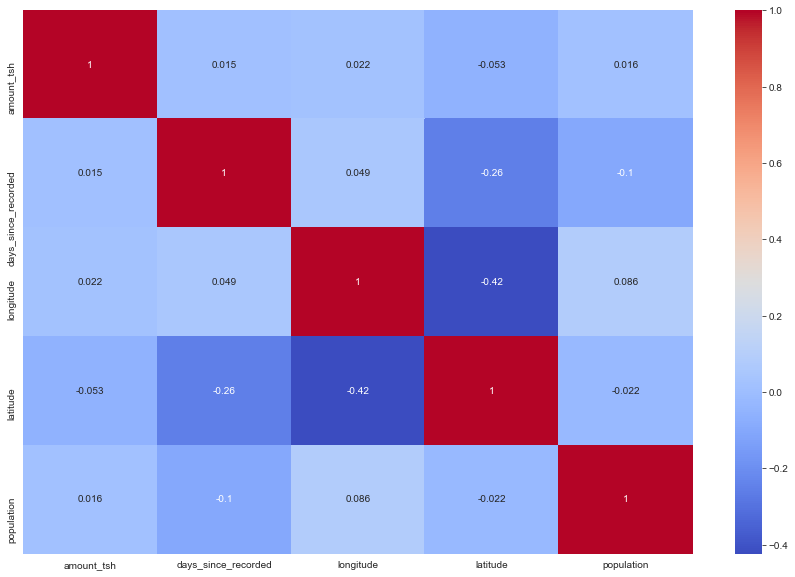

In [148]:
# Checking for collinearity
cor = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(cor.round(3),annot = True,cmap = 'coolwarm')
plt.show()

- Features do not have a high collinerity amongst themselves
- This is good data

## 2.5. Exploratory Data Analysis (EDA)

In trying to understand our data better, let's check for the distribution of the individual features in our dataset.

Answer a few questions:

1. What is the distribution of numerical features?
2. What is the relationship between functionality and money invested?
3. Do all functional waterpoint have good quality water?
4. What is the ranking of the status of the waterpoints?
5. What is the status of waterpumps with different extraction types?
6. What is the distribution of the status of waterpumps across regions?


## 2.5.1. What is the distribution of numerical features?

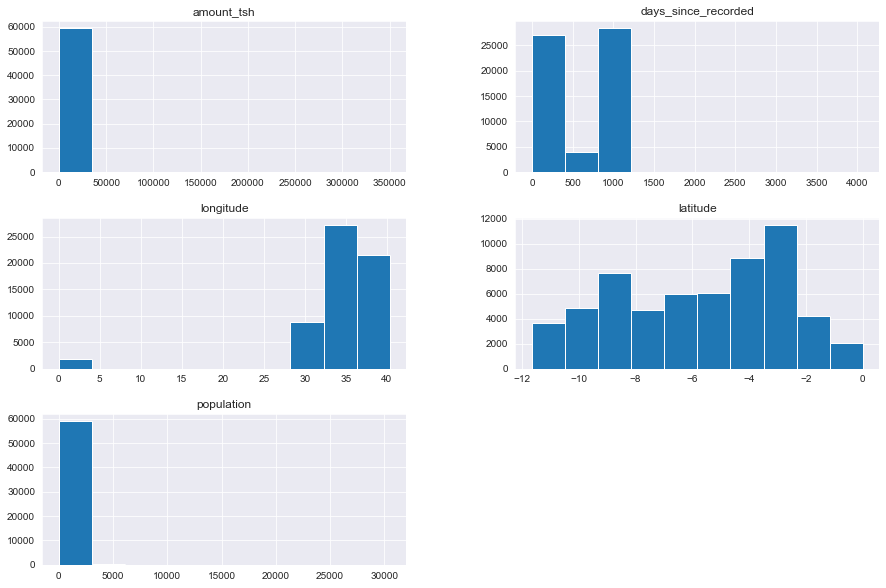

In [149]:
# Getting distribution of numerical features
train.hist(figsize = (15,10));

## 2.5.2 Relationship between functionality and money spent?

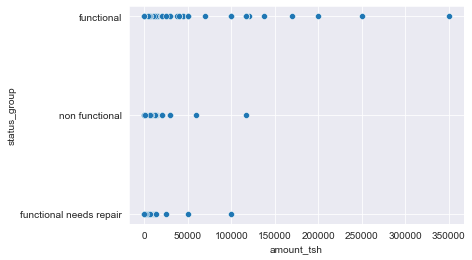

In [150]:
sns.scatterplot(data = train, x = 'amount_tsh', y = 'status_group')
plt.show()

### Observation
- Waterpumps that had high investments are all functional

## 2.5.3. Do all functional waterpoint have good quality water?

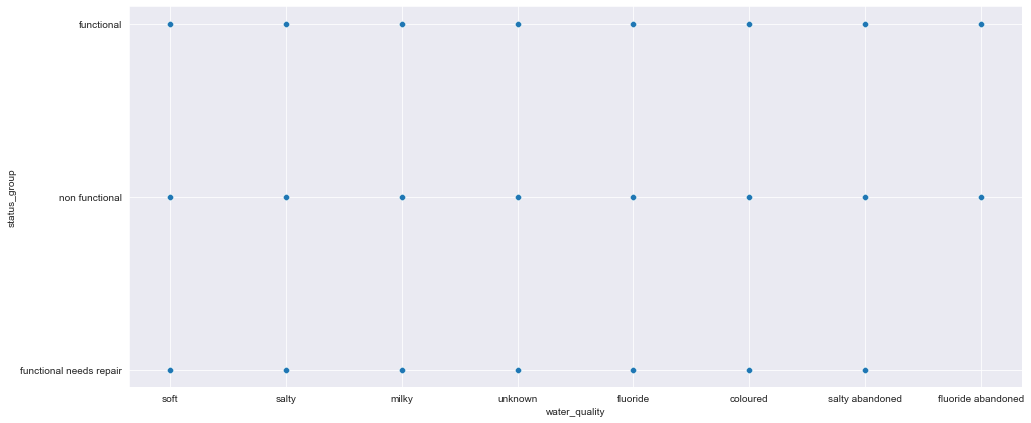

In [151]:
plt.figure(figsize = (16, 7))
sns.scatterplot(data = train, x = 'water_quality', y = 'status_group')
plt.show()

## 2.5.4.  Ranking of the status of the waterpoints?

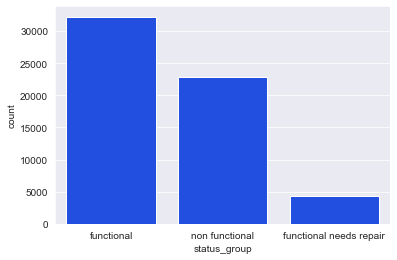

In [152]:
# Ranking of the status of the waterpoints
sns.set_style("darkgrid");
sns.set_color_codes(palette = 'bright');
sns.countplot(x = train['status_group'], color = 'b');

### Observation
- There are more functional waterpoints which is great
- There are more non functional waterpoints than functional ones that need repair

## 2.5.5. What is the status of waterpumps with different extraction types?

In [153]:
# Status group of different extraction types
df = train.groupby(['extraction_type_class', 'status_group']).count()['permit'].head(200).reset_index()


fig = px.bar(df, x = "extraction_type_class", y = "permit",color = "status_group", 
             title="Distribution of waterpumps", width=1000, height=500)

fig.show()

del df

### Observation
- Waterpumps relying on gravity and handpump are the most functional.
- Technologocally advanced waterpumps seem to have more non functionals e.g. motorpump
- It would be a great idea to explore if fuel shortage could be a causal factor. 

## 2.5.6. What is the distribution of the status of waterpumps across regions?

In [154]:
# Distribution of the status of waterpumps across regions

df = train.groupby(['region', 'status_group']).count()['permit'].head(200).reset_index()


fig = px.bar(df, x = "region", y = "permit", color = "status_group", title = "Distribution of waterpumps", 
             width = 1000, height = 500)

fig.show()

del df

### Observation
- Iringa has the highest number of functional waterpumps
- Most regions have more functional waterpumps than non functional
- The ratio of functional need repair waterpumps is smaller for all regions

## 2.6.  Pre-Processing Data
- Here I will drop some columns which may not be relevant for my modelling
- I will rank status of waterpumps as 0,1,2
- Create dummmies for categotical columns

## 2.6.1. Dropping non-relevant columns
- The left out geographical data are less likely to add any predictive power to the model

In [155]:
# I will drop these columns
train = train.drop(['region', 'longitude', 'latitude', 'lga'], axis=1)

## 2.6.2. status_group
- I will categorize the values in the column into 0, 1, 2

In [156]:
# Create a column assigning 0,1,2 for target variable
val_status_group={'functional':2, 'functional needs repair':1,
                   'non functional':0}
train['status_group_vals']=train.status_group.replace(val_status_group)

In [157]:
# Drop column
train = train.drop(['status_group'],axis=1)

## 2.6.3. Create dummies
- Creating dummies for categorical columns

In [158]:
# Create dummies for caterogical columns
categoricals = ['funder', 'installer', 'basin', 'public_meeting', 'scheme_management', 'permit',
              'construction_year', 'extraction_type_class','management_group', 'payment_type', 'water_quality',
              'quantity', 'source_type', 'source_class','waterpoint_type_group']

train = pd.get_dummies(train, columns = categoricals)


In [159]:
train.shape

(59364, 92)

# 3. Modelling

The metric I will be using for modellling is Accuracy

For modelling I will apply:

### 1. Perform an X_Train-y_Test Split

### 2. Build and Evaluate a Baseline Model


### 3. Grid search to Find the Random Forest Model


### 4. Build Iterative Models to Find the Best Decision Tree Model

### 5. Build additional Logistic Regression Models


### 7. Choose and Evaluate a Final Model


## 3.1. Perform an X_Train-y_Test Split

In [160]:
# Create y_train and X_train
y = train.status_group_vals
X = train.drop('status_group_vals', axis=1)

In [161]:
# check the dummy accuracy of the raw data
print("Raw Counts")
print(train["status_group_vals"].value_counts())
print()
print("Percentages")
print(train["status_group_vals"].value_counts(normalize=True))

Raw Counts
2    32237
0    22813
1     4314
Name: status_group_vals, dtype: int64

Percentages
2    0.54304
0    0.38429
1    0.07267
Name: status_group_vals, dtype: float64


functional - 0.54304

functional needs repair - 0.38429
                   
non functional - 0.07267

Dummy Accuracy =  0.54304

Because 54.30% of the waterpoints are functional

Prediction of functional waterpoints would be at 54.30% accuracy

In [162]:
# perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [163]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47491, 91)
(47491,)
(11873, 91)
(11873,)


## 3.2. Baseline Model
- Without performing any preprocessing or hyperparameter tuning, build and evaluate a several classification models then pick the top three for further tuning.

In [170]:
# Create names for the different classification methods
rf = RandomForestClassifier(random_state = 42)
lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
knn = KNeighborsClassifier()
nb = GaussianNB()

In [171]:
# Create a function for classification
train_accuracy = []
test_accuracy = []
model_list = [rf,lr, dt, knn, nb]
for i in model_list:
    i = i.fit(X_train, y_train)
    ytrain_pred = i.predict(X_train)
    ytest_pred = i.predict(X_test)
    train_accuracy.append(accuracy_score(ytrain_pred, y_train))
    test_accuracy.append(accuracy_score(ytest_pred, y_test))

In [172]:
# print train accuracy
train_accuracy

[0.9398833463182498,
 0.7184308605841107,
 0.9399465161820134,
 0.7838958960645175,
 0.6234444421048199]

In [167]:
# print test accuracy
test_accuracy

[0.7862376821359387,
 0.7195317106038912,
 0.7510317527162469,
 0.6998231281057863,
 0.6286532468626295]

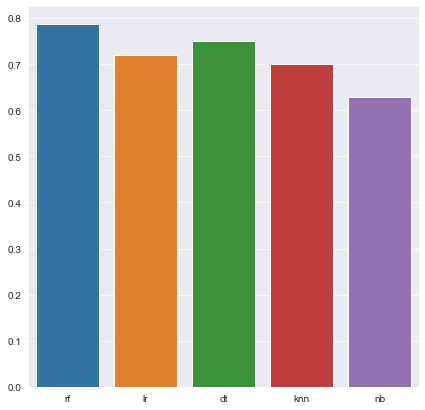

In [173]:
# I will visualize the test accuracy results
model_names = ["rf","lr","dt","knn", "nb"]
plt.figure(figsize = (7, 7))
sns.barplot(x = model_names, y = test_accuracy)
plt.show()

### Summary of results

- Random Forest Classifier
      - Train Accuracy = 93.99%
      - Test Accuracy = 78.62%
- Logistic Regression Classifier
      - Train Accuracy = 71.84%
      - Test Accuracy = 71.95%
- Decision Tree accuracy 
      - Train Accuracy = 93.99%
      - Test Accuracy = 75.10%
- KNN accuracy 
      - Train Accuracy = 78.39%
      - Test Accuracy = 69.98%
- Gaussian accuracy
      - Train Accuracy = 62.34%
      - Test Accuracy =  62.87%


Using the test accuracy, the top perfoming models are:
- Random Forest Classifier (best)
- Decision Tree Classifier
- Logisitic Regression Classifier

I will perform more tuning to these three classification models to improve them

## 3.3. Random Forest
- hyperparameter tuning to improve model accuracy

- Using random search, I will carry out several iterations to get the best conditions for random forest and run them to get an accuracy.

In [174]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [175]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf1_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf1_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 14, 18, 23, 27, 32,
                                                         36, 41, 45, 50]},
                   random_state=42, verbose=2)

In [176]:
rf1_random.best_params_

{'n_estimators': 36,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [177]:
# Instantiate and fit a RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators = 36, min_samples_split = 5, 
                                 min_samples_leaf = 2, max_features = 'sqrt', max_depth = None, bootstrap = False,
                                 random_state = 42)
forest1.fit(X_train, y_train)
#ytrain_pred = forest1.predict(X_train)

# Training accuracy score
print('Train:', forest1.score(X_train, y_train))
print()
print('Test:', forest1.score(X_test, y_test))

Train: 0.8759765008106799

Test: 0.8003032089615093


### Random Forest results

- random model 1: 78.62%
- random model 2: 80.03%

The second model is a better fit

## 3.4. Decision Tree Model
- I will carry out hyperparameter tuning to see what effect it has on the performance of our decision tree and to check whether it will improve the performance.
- To do this I will carry out a grid search to get the best parameters and apply them.
- I will further try using a bagging classifier to reduce noice and see if this would improve the model
- To check for the performance of the model, we will use ROC-AUC.

In [178]:
#Using GridSearchCV
par={
    'max_depth':[2, 4, 5, 10],
    'min_samples_leaf': [5, 15, 20, 50],
    'min_samples_split': [10, 20, 30, 40],
    'criterion':['gini','entropy']
}

In [179]:
#Instantiating the grid search
D_tree = DecisionTreeClassifier()
g_search = GridSearchCV(estimator = D_tree,
                      param_grid = par,
                      scoring = 'accuracy', cv=5)

In [180]:
#Fitting grid search
g_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 10],
                         'min_samples_leaf': [5, 15, 20, 50],
                         'min_samples_split': [10, 20, 30, 40]},
             scoring='accuracy')

In [181]:
# Getting best parameters
dt1 = g_search.best_estimator_
dt1 

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [182]:
# Instatiate desicion tree
# Increase the number of minimun samples split to 50
dt1 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, min_samples_split=10, random_state = 42)
dt1.fit(X_train, y_train)
y_pred = dt1.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label = 2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7387783770548528

In [183]:
# Previous model performed better
# I will now adjust more features
dt2 =  BaggingClassifier(DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, random_state = 42))
dt2.fit(X_train, y_train)
y_pred = dt2.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label = 2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7456701475617712

### Decision Tree Train accuracy results
-  Decision Tree model 1 = 75.10%
-  Decision Tree model 2 = 73.88%
- Decision Tree model 3 = 74.57%

The first model performs better

## 3.5 Logistic Regression

- I will apply a standard scaler to transfrom the data and see if this would improve the accuracy

In [184]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [185]:
#Fitting the model
lr = LogisticRegression(random_state = 42, fit_intercept = False, C = 1e15, solver = 'liblinear')
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1000000000000000.0, fit_intercept=False, random_state=42,
                   solver='liblinear')

In [186]:
y_pred = lr.predict(X_test_scaled)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label = 2)
AUC = auc(false_positive_rate, true_positive_rate)
AUC

0.7584633772714704

### Logistic Regression results
- LR model 1 = 71.95%
- LR model 2 = 75.85%

The second model performed better

## 3.6. Evaluation

- Choosing the model that has the best performance, I will instantiate a final model with these best parameters.


In [187]:
# Replace None with appropriate code
final_model = RandomForestClassifier(n_estimators = 36, min_samples_split = 5, 
                                 min_samples_leaf = 2, max_features = 'sqrt', max_depth = None, bootstrap = False,
                                 random_state = 42)

# Fit the model on the full training data
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=36, random_state=42)

- I will now evaluate the log loss, accuracy, precision, and recall. 

In [188]:
preds = final_model.predict(X_test)
probs = final_model.predict_proba(X_test)


print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print(classification_report(y_test, preds, digits=3))

log loss:  0.5055087607965707
accuracy:  0.8003032089615093
              precision    recall  f1-score   support

           0      0.845     0.752     0.796      4561
           1      0.599     0.252     0.355       876
           2      0.786     0.909     0.843      6436

    accuracy                          0.800     11873
   macro avg      0.743     0.638     0.665     11873
weighted avg      0.795     0.800     0.789     11873



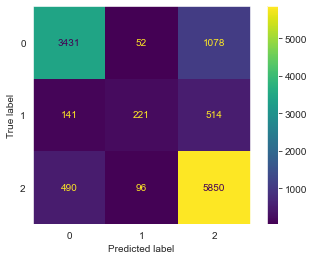

In [189]:
#Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test);
plt.grid(False)
#plt.show()

# Interpretation

##### dummy accuracy = 54.30%

##### final model accuracy = 80.03% 

The model has a 80.03% accuracy which is an improvement from the dummy.

Functional precision = 0.786
- There is a 78.6% chance that a waterpoint is functional if the model says it is functional

Functional recall = 0.909
- There is a 90.9% chance that our model will label correctly if a cell is functional


Non-Functional precision = 0.845
- There is a 84.5% chance that a waterpoint is non-functional if the model says it is non-functional

Non-Functional recall = 0.752
- There is a 75.2% chance that our model will label correctly if a cell is functional

# 4. Conclusion

- The final model at 80.03% is a good prediction model that is ready for deployment. 
- With the high but balanced precision and recall results, the ML model advices greatly on which waterpoints to prioritise efforts on which further informs wise investments.
- There are different qualities of water in the different functional pumps
- All waterpoints with huge investment costs are functional
- Gravity and Hand pump water pumps are the most functional

# 5. Recommendations

- With few functional waterpumps that need repairs, it would be a great investment opportunity to repair them before they turn non functional.
- The damage requiring repair should however be accessed to know if it is cheaper repairing or having a new one.
- Futher investigation should be done on the highly technical water pumps to understand if communities would need training to use them and if they are sustainable due to costs involved. e.g Fuel Purchase
- With the Machine Learning model having high accuracy prediction, priority should be placed on conditions of waterpumps and accessibility to hasten implementation of project
